In [1]:
print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

Automatically created module for IPython interactive environment


In [2]:
np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

In [3]:
n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

In [4]:
sample_size = 300

In [5]:
print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))

n_digits: 10, 	 n_samples 1797, 	 n_features 64


In [6]:
print(82 * '_')

__________________________________________________________________________________


In [7]:
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette


In [8]:
def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

In [9]:
bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

k-means++	0.77s	69432	0.602	0.650	0.625	0.465	0.598	0.146
random   	0.30s	69694	0.669	0.710	0.689	0.553	0.666	0.147


In [10]:
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)

PCA-based	0.02s	71820	0.673	0.715	0.693	0.567	0.670	0.150


In [11]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [18]:
reduced_data.shape

(1797, 2)

In [17]:
data.shape

(1797, 64)

In [14]:
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [15]:
print(x_min, x_max, y_min, y_max, xx, yy)

-7.99725329578 10.9825596302 -7.67530851581 10.8610314228 [[ -7.9972533  -7.9772533  -7.9572533 ...,  10.9227467  10.9427467
   10.9627467]
 [ -7.9972533  -7.9772533  -7.9572533 ...,  10.9227467  10.9427467
   10.9627467]
 [ -7.9972533  -7.9772533  -7.9572533 ...,  10.9227467  10.9427467
   10.9627467]
 ..., 
 [ -7.9972533  -7.9772533  -7.9572533 ...,  10.9227467  10.9427467
   10.9627467]
 [ -7.9972533  -7.9772533  -7.9572533 ...,  10.9227467  10.9427467
   10.9627467]
 [ -7.9972533  -7.9772533  -7.9572533 ...,  10.9227467  10.9427467
   10.9627467]] [[ -7.67530852  -7.67530852  -7.67530852 ...,  -7.67530852  -7.67530852
   -7.67530852]
 [ -7.65530852  -7.65530852  -7.65530852 ...,  -7.65530852  -7.65530852
   -7.65530852]
 [ -7.63530852  -7.63530852  -7.63530852 ...,  -7.63530852  -7.63530852
   -7.63530852]
 ..., 
 [ 10.80469148  10.80469148  10.80469148 ...,  10.80469148  10.80469148
   10.80469148]
 [ 10.82469148  10.82469148  10.82469148 ...,  10.82469148  10.82469148
   10.82469

In [41]:
np.c_[xx.ravel(), yy.ravel()].shape

(879723, 2)

In [36]:
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

In [45]:
Z.shape

(927, 949)

In [46]:
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

In [47]:
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)

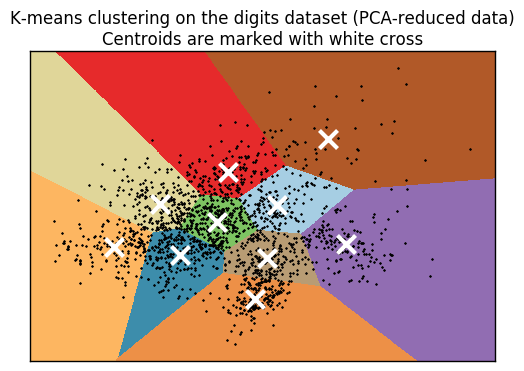

In [48]:
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()